# Fashion-MNIST-Localised-Backdoor
### TSNE for Feature Representations 

#### Imports

In [2]:
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

### Constants

In [1]:
model_type_arr = ['Backdoored', 'Clean']
colors_plotting = ['r', 'b']
labels_plotting = ['Translated', 'Clean'] 

## Loop to generate all t-SNE of the feature representations

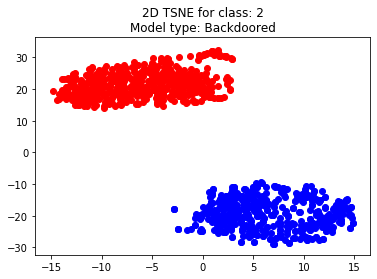

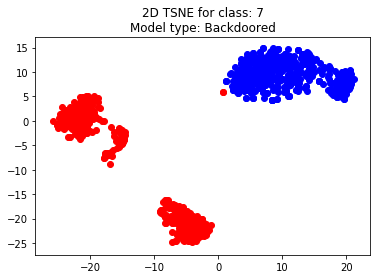

In [6]:
model_type_choice = 0
for targ_lbl in range(10):
    

    filename = "saved_pickles/feature-representations/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/clean-image-feature-representations-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        clean_image_feature_representations = pickle.load(handle)

    filename = "saved_pickles/feature-representations/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/translated-image-feature-representations-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        translated_image_feature_representations = pickle.load(handle)
    
    

    tsne = TSNE(n_components=2, perplexity=30)

    X_arr = np.concatenate((clean_image_feature_representations, translated_image_feature_representations), 0)

    Y_arr = []
    for i in range(len(clean_image_feature_representations)):
        Y_arr.append(1)

    for i in range(len(translated_image_feature_representations)):
        Y_arr.append(0)

    X_arr_tsne = tsne.fit_transform(X_arr)
    
    filename = "saved_pickles/2d-tsne-feature-representation/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/feature-representations-tsne2d-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'wb') as handle:
        pickle.dump((X_arr_tsne, Y_arr), handle)

    plt.title("2D TSNE for class: " + str(targ_lbl) + "\nModel type: "+  model_type_arr[model_type_choice])
    for X, Y in zip(X_arr_tsne, Y_arr):\
        plt.scatter(X[0], X[1], c = colors_plotting[Y], label=labels_plotting[Y])
    #     plt.imshow()
    plt.show()

